In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')

from matplotlib.pyplot import imshow
from keras.preprocessing import image
from keras import applications
from keras.models import Sequential
import os,sys

Using TensorFlow backend.


In [3]:
cd E:\dog-breed-classifier

E:\dog-breed-classifier


(1, 224, 224, 3)

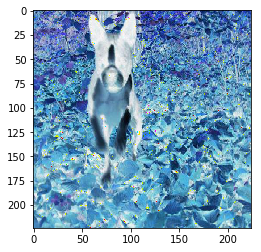

In [20]:
img=image.load_img("train/000bec180eb18c7604dcecc8fe0dba07.jpg",target_size=(224,224))
a=image.img_to_array(img)
imshow(a)
b=np.expand_dims(a,axis=0)
b.shape
c=preprocess_input(b)
c.shape

In [9]:
def load_Dataset():
    arrays_train=[]
    names_train=[]

    for name in os.listdir('train'):
        img=image.load_img("train/"+name,target_size=(224,224))
        b=image.img_to_array(img)
        arrays_train.append(b)
        names_train.append(name)  

    train=np.stack(arrays_train)
    print("train_data_shape:"+str(train.shape))
    names_train=list(map(lambda x:x.split(".jpg")[0],names_train))
    labels=pd.read_csv("labels.csv")
    names_df=pd.DataFrame(np.array(names_train),columns=["id"])
    joined_df=names_df.join(labels.set_index('id'),on="id",how="left")
    Y=joined_df['breed']
    return train,Y


In [5]:
train,Y=load_Dataset()

train_data_shape:(10222, 224, 224, 3)


In [4]:
def load_array(fname,arr):
    return np.load(open(fname,'rb'))
def load_Cropped_data():
    X_train=load_array('train_dataset.npy')
    train_labels=load_array('train_labels.npy')
    X_test=load_array('test_dataset.npy','rb')
    test_labels=load_array('test_labels.npy')
    return X_train,train_labels,X_test,test_labels

In [4]:
def load_array(fname):
    return np.load(open(fname,'rb'))
train_labels=load_array('train_labels.npy')
valid_labels=load_array('valid_labels.npy')

In [4]:
def load_array(fname):
    return np.load(open(fname,'rb'))
X_train=load_array('train_dataset.npy')

In [6]:
val_data=load_array('valid_dataset.npy')

In [5]:
def Hot_encoder(Y):
    from sklearn.preprocessing import LabelBinarizer
    lb=LabelBinarizer()
    Y_new=lb.fit_transform(Y)
    Y_new.shape
    return Y_new
Y_train_hot=Hot_encoder(train_labels)
Y_val_hot=Hot_encoder(valid_labels)

In [10]:
array_test=[]
names_test=[]
for name in os.listdir('test'):
    img=image.load_img("test/"+name,target_size=(224,224))
    arrays_test.append(b)
    names_test.append(name) 
test=np.dstack(arrays_test)   


NameError: name 'arrays_test' is not defined

In [10]:
'''
We now check for Class Imbalance in the training set
'''
def class_Distribution(Y,string):
    unique,counts=np.unique(Y,return_counts=True)
    dictionary={'classes':unique,'value_counts':counts}
    df=pd.DataFrame(counts).T.rename(index={0:'value_counts'})
    df.columns=unique
    if  not df.shape[1]==120:
        print("Class Imbalance In the Distribution:"+string)
    else:
        print("Distribution Fine:"+string)
    return df
df=class_Distribution(Y,"train")
df

Distribution Fine:train


,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
value_counts,80,116,86,107,74,78,102,110,82,105,...,80,79,70,69,85,79,81,95,82,82


In [12]:
def Normalize_Input(X):
    minimum=0
    maximum=255
    X-minimum/(maximum-minimum)
    return X

In [15]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler(with_std=False)
scaled_train=Scaler.fit_transform(train)

KeyboardInterrupt: 

In [17]:
##Normalizing The training Data
Normalized_train=Normalize_Input(train)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train_Centered,Y,test_size=0.33,random_state=2)
dist_train=class_Distribution(Y_train,"train")
dist_test=class_Distribution(Y_test,"test")
Y_train_hot=Hot_encoder(Y_train)
Y_test_hot=Hot_encoder(Y_test)

Distribution Fine:train
Distribution Fine:test


In [14]:

print("X_train shape:"+str(X_train.shape))
print("X_test shape:"+str(X_test.shape))
print("Y_train shape:"+str(Y_train_hot.shape))
print("Y_test shape:"+str(Y_test_hot.shape))

X_train shape:(6848, 224, 224, 3)
X_test shape:(3374, 224, 224, 3)
Y_train shape:(6848, 120)
Y_test shape:(3374, 120)


In [20]:
def top_model(Input_shape,X_train,X_test):
    X=Input(Input_shape)
    model = applications.VGG16(include_top=False, weights='imagenet',input_shape=Input_shape)
    train_frozen_weights=model.predict(X_train)
    np.save(open('train_freezemodel_weights.npy','wb'),train_frozen_weights)
    test_frozen_weights=model.predict(X_test)
    np.save(open('test_freezemodel.npy','wb'),test_frozen_weights)
    
    
    

In [9]:
from keras.applications.vgg16 import preprocess_input

In [10]:
processed_train=preprocess_input(X_train)

In [11]:
processed_validation=preprocess_input(val_data)

In [12]:
processed_train.shape

(9600, 224, 224, 3)

In [19]:
model = applications.VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
train_frozen=model.predict(processed_train,verbose=1,batch_size=16)

9600/9600 [==============================] - 1838s 192ms/step


In [21]:
np.save(open('train_frozen.npy','wb'),train_frozen)

In [24]:
val_frozen=model.predict(val_data,verbose=1,batch_size=16)

2400/2400 [==============================] - 415s 173ms/step


In [26]:
np.save(open('val_frozen.npy','wb'),val_frozen)

In [10]:
from keras import applications
model = applications.VGG16(include_top=False, weights='imagenet')

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [15]:
model = applications.VGG16(include_top=False, weights='imagenet',input_shape=X_train.shape[1:])
train_frozen_weights=model.predict(X_train,verbose=1,batch_size=1024)
test_frozen_weights=model.predict(X_test,verbose=1,batch_size=1024)

ResourceExhaustedError: OOM when allocating tensor with shape[1024,224,224,64]
	 [[Node: block1_conv1/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_input_1_0_0, block1_conv1/kernel/read)]]

Caused by op 'block1_conv1/convolution', defined at:
  File "C:\Users\SANYAM\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\SANYAM\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-e5cc5619e3d6>", line 1, in <module>
    model = applications.VGG16(include_top=False, weights='imagenet',input_shape=X_train.shape[1:])
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\keras\applications\vgg16.py", line 115, in VGG16
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\keras\engine\topology.py", line 603, in __call__
    output = self.call(inputs, **kwargs)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\keras\layers\convolutional.py", line 164, in call
    dilation_rate=self.dilation_rate)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 3195, in conv2d
    data_format=tf_data_format)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 751, in convolution
    return op(input, filter)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 835, in __call__
    return self.conv_op(inp, filter)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 499, in __call__
    return self.call(inp, filter)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py", line 187, in __call__
    name=self.name)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 630, in conv2d
    data_format=data_format, name=name)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[1024,224,224,64]
	 [[Node: block1_conv1/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_input_1_0_0, block1_conv1/kernel/read)]]


In [26]:
np.save(open('train_freezemodel_weights.npy','wb'),train_frozen_weights)

In [16]:
np.savez(open('train_test_centered.npz','wb'),a=X_train,b=X_test)

In [17]:
np.savez(open('train_test_hot_labels_centered.npz','wb'),a=Y_train_hot,b=Y_test_hot)

In [49]:
test_frozen_weights=model.predict(X_test,verbose=1,batch_size=15)

3374/3374 [==============================] - 2460s 729ms/step


In [27]:
np.save(open('test_freezemodel.npy','wb'),test_frozen_weights)

In [28]:
train_frozen_weights.shape

(6848, 7, 7, 512)

In [6]:
def load_cache():
    train_frozen=np.load(open('train_frozen.npy','rb'))
    val_frozen=np.load(open('val_frozen.npy','rb'))
   
    return train_frozen,val_frozen

In [7]:
train_frozen,val_frozen=load_cache()

In [12]:
from keras import optimizers
from keras import regularizers
opt=optimizers.SGD(lr=1,decay=.6)
import keras
from keras.layers import BatchNormalization

In [13]:
def VGG16(Input_shape,classes):
    X_Input=Input(Input_shape)
    X=Flatten()(X_Input)
    X=Dropout(.4)(X)
    X=Dense(2048,activation='relu')(X)
    X=BatchNormalization()(X)
    X=Dropout(0.4)(X)
    X=Dense(2048,activation='relu')(X)
    X=BatchNormalization()(X)
    X=Dropout(0.2)(X)
    
    X=Dense(classes,activation='softmax')(X)
    

    model=Model(inputs=X_Input,outputs=X)
    return model
    

In [14]:
Input_shape=train_frozen.shape[1:]
model=VGG16(Input_shape,120)


In [15]:
##model.load_weights('model_op_sgd.lr_1e-3-50epoche')
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history1=model.fit(train_frozen,Y_train_hot,epochs=50,batch_size=256,validation_data=(val_frozen,Y_val_hot))

Train on 9600 samples, validate on 2400 samples
Epoch 1/50
9600/9600 [==============================] - 133s 14ms/step - loss: 2.4816 - acc: 0.4082 - val_loss: 2.6868 - val_acc: 0.3542
Epoch 2/50
9600/9600 [==============================] - 26s 3ms/step - loss: 1.0980 - acc: 0.6824 - val_loss: 2.3137 - val_acc: 0.3912
Epoch 3/50
9600/9600 [==============================] - 25s 3ms/step - loss: 0.9268 - acc: 0.7315 - val_loss: 2.2478 - val_acc: 0.4067
Epoch 4/50
9600/9600 [==============================] - 25s 3ms/step - loss: 0.8528 - acc: 0.7576 - val_loss: 2.2386 - val_acc: 0.4121
Epoch 5/50
9600/9600 [==============================] - 25s 3ms/step - loss: 0.8173 - acc: 0.7674 - val_loss: 2.2420 - val_acc: 0.4121
Epoch 6/50
9600/9600 [==============================] - 25s 3ms/step - loss: 0.7632 - acc: 0.7837 - val_loss: 2.2501 - val_acc: 0.4129
Epoch 7/50
9600/9600 [==============================] - 24s 3ms/step - loss: 0.7491 - acc: 0.7903 - val_loss: 2.2529 - val_acc: 0.4108
Epoch

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-63771aec532c>", line 1, in <module>
    history1=model.fit(train_frozen,Y_train_hot,epochs=50,batch_size=256,validation_data=(val_frozen,Y_val_hot))
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\keras\engine\training.py", line 1657, in fit
    validation_steps=validation_steps)
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\keras\engine\training.py", line 1202, in _fit_loop
    ins_batch = _slice_arrays(ins[:-1], batch_ids) + [ins[-1]]
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\keras\engine\training.py", line 415, in _slice_arrays
    return [None if x is None else x[start] for x in arrays]
  File "C:\Users\SANYAM\Anaconda3\lib\site-packages\keras\engine\training.py", line 415, in <listcomp>
    return [None if x is None else x[start] for x in a

KeyboardInterrupt: 

In [13]:
model.save_weights('model_VGG16bn_lr_1e-1')

In [63]:
train_frozen_weights.shape[1:]

(7, 7, 512)

In [70]:
input_tensor = Input(shape=(150,150,3))
  base_model = VGG16(weights='imagenet',include_top= False,input_tensor=input_tensor)
  top_model = Sequential()
  top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
  top_model.add(Dense(256, activation='relu'))
  top_model.add(Dropout(0.5))
  top_model.add(Dense(1, activation='sigmoid'))
  top_model.load_weights('bootlneck_fc_model.h5')
  model = Model(input= base_model.input, output= top_model(base_model.output))